In [1]:
#libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

#models 
from sklearn.ensemble import RandomForestClassifier


In [2]:
titanic_train = pd.read_csv("train.csv")
titanic_test = pd.read_csv("test.csv")

# pclass:    Ticket class 
# sibsp:     siblings / spouses  in the ship
# parch:     parents / children in the ship
# cabin:     Cabin number
# embarked:  Port of Embarkation

In [3]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
#checking for missing values 
missing_total = titanic_train.isnull().sum()
missing_total

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#plotting 
#attributes = ['Survived','Pclass','Sex','Age','SibSp','Parch','Ticket','Fare','Embarked']
corr_matrix = titanic_train.corr()
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

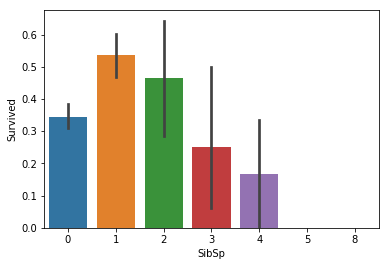

In [8]:
sns.barplot(x='SibSp', y='Survived', data=titanic_train)

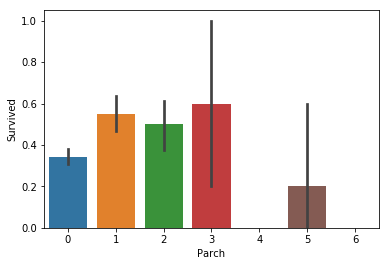

In [9]:
sns.barplot(x='Parch', y='Survived', data=titanic_train)

C:\Users\Ishitha\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


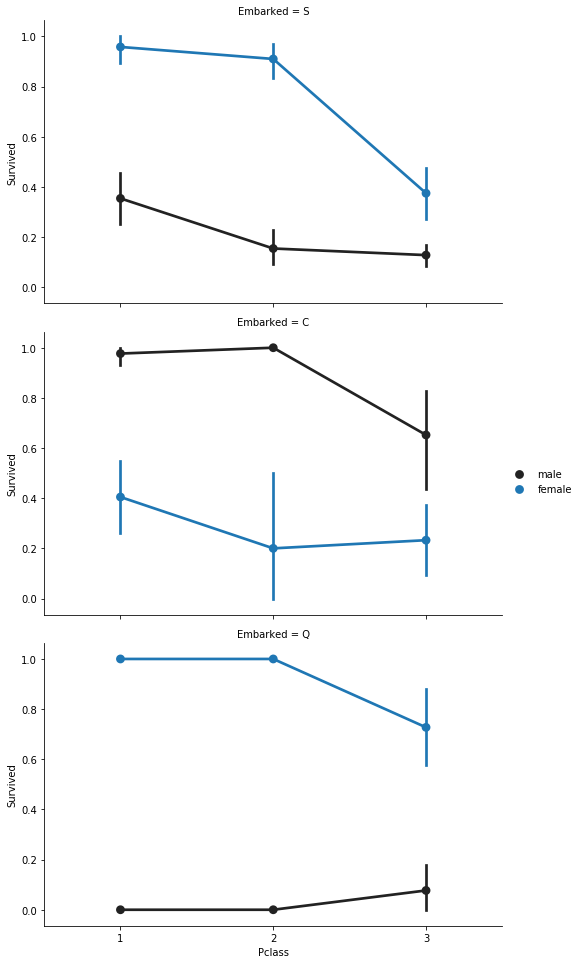

In [10]:
Grid = sns.FacetGrid(titanic_train, row='Embarked', size=4.5, aspect=1.6)
Grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
Grid.add_legend()

C:\Users\Ishitha\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


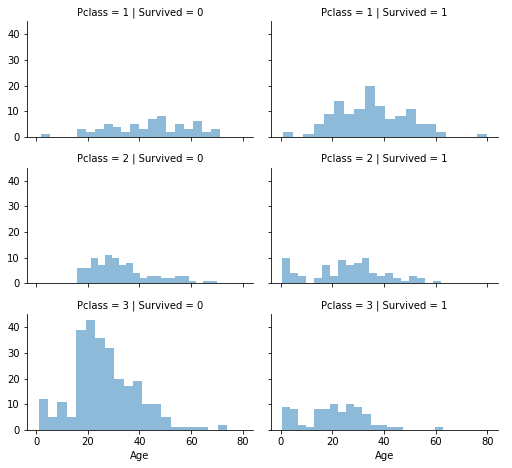

In [11]:
grid = sns.FacetGrid(titanic_train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [12]:
# Trying out attribute combinations 
titanic_train['SibSpParch'] = (titanic_train['SibSp'] + titanic_train['Parch']) % 2
#titanic_train.corr()['Survived']['SibSpParch']
corr_matrix = titanic_train.corr()
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
SibSpParch     0.157418
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [13]:
# titanic_train['new'] = ((titanic_train['Fare']/10) + titanic_train['SibSpParch'])
# titanic_train.corr()['Survived']['new']

In [14]:
titanic_test['SibSpParch'] = (titanic_test['SibSp'] + titanic_test['Parch']) % 2

# Preprocessing 

In [15]:
# Dropping out useless features 
titanic_train_labels = titanic_train['Survived'].copy()
titanic_train = titanic_train.drop(['Survived','PassengerId','Name','Ticket','Cabin'], axis=1)
titanic_test = titanic_test.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
#Too much missing values in Cabin but here a cabin number looks like ‘C123’ and the letter refers to the deck
#so you can try to find something which makes sense using Cabin 
titanic_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,SibSpParch
0,3,male,22.0,1,0,7.2500,S,1
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,0
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


In [16]:
# fill missing values in Embarked using common value
titanic_train['Embarked'].describe()
# since common values is S 
common ='S'
datasets = [titanic_train, titanic_test]
for val in datasets:
    val['Embarked']=val['Embarked'].fillna(common)
# titanic_test.isnull().sum()
# titanic_train.isnull().sum()

In [17]:
# Fill Age with median 
median = titanic_train['Age'].median()
titanic_train = titanic_train.fillna(median)
titanic_test = titanic_test.fillna(median)

### Converting categorical data into numerical data  

In [18]:
# 1. Sex
gender = {"male":1, "female":0}
datasets = [titanic_train, titanic_test]
for val in datasets:
    val['Sex'] = val['Sex'].map(gender)

In [19]:
# 2. Embarked 
# Here you can use sklearn onehotencoder or pandas get dummies 
titanic_train = pd.get_dummies(titanic_train)
titanic_test = pd.get_dummies(titanic_test)

# Training using machine learning models 

### 1. Random Forest 

In [25]:
model = RandomForestClassifier(n_estimators=100)
model.fit(titanic_train, titanic_train_labels)
score = round(model.score(titanic_train, titanic_train_labels)*100, 2)
score

97.98

### To be cont.
## 2. Logistic Regression
## 3. K Nearest Neighbor
## 4. Gaussian Naive Bayes
## 5. Stochastic Gradient Descent (SGD)
## 6. Linear Support Vector Machine
## 7. Decision Tree
## 8. Perceptron

## And then we have K-Fold Cross Validation

## Predicting using test set 

In [21]:
pred = model.predict(titanic_test)

## Saving predictions 

In [23]:
# final_dframe = pd.DataFrame()
# titanic_test = pd.read_csv("test.csv")
# final_dframe['PassengerId'] = titanic_test['PassengerId']
# final_dframe['Survived'] = pred
# print(final_dframe)
# final_dframe.to_csv('sub_9_21.csv',index=False)